# Exploratory Data Analysis

Get to know a bit about your problem before you dive in! Then learn how to statistically and visually inspect your dataset!

## Preparing the environment

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

from environment import histogram_boxplot

from pyspark.sql.types import (_parse_datatype_string, StructType, StructField,
                               DoubleType, IntegerType, StringType)
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

### Connect to Spark

In [2]:
spark = SparkSession.builder.getOrCreate()

# eval DataFrame in notebooks
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [3]:
sc = spark.sparkContext

### Loading data

In [4]:
# read file
real_state = spark.read.csv('data-sources/2017_StPaul_MN_Real_Estate.csv', header=True, inferSchema=True)

# cast columns
for col_name in ['SQFTBELOWGROUND', 'AssociationFee']:
    real_state = real_state.withColumn(col_name, real_state[col_name].cast('bigint'))
real_state = real_state.withColumn('backonmarketdate', real_state['backonmarketdate'].cast('double'))
real_state = real_state.withColumn("offmarketdate", 
                                       F.to_timestamp(real_state["offmarketdate"], "M/d/yyyy H:m"))

# save to parquet format
file_path = 'spark-warehouse/real_state.parquet'
real_state.write.parquet(file_path, mode="overwrite")
real_state = spark.read.parquet(file_path)
real_state.createOrReplaceTempView("real_state")
real_state.printSchema()
real_state.limit(2)

root
 |-- No.: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: timestamp (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullabl

No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
1,RMLS,11511,11511 Stillwater ...,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,2017-07-30 00:00:00,0,12 x 9,"Living Room, Dini...",NULL,Main,No,NULL,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,NULL,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher...",NULL,NULL,NULL,Vinyl,NULL,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,Main Floor 3/4 Ba...,13 x 11,Main,10 x 10,Main,NULL,NULL,NULL,NULL,3,0,NULL,0,Unknown,0.0
2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,NULL,C1,100x140,834 - Stillwater,4,2017-10-13 00:00:00,0,11x11,"Living Room, Dini...","Asphalt Shingles,...",Main,No,NULL,4,"Attached Garage, ...",1268,1640,Main,22x14,1640.0,2017,2228,NULL,1971,Residential-Single,(SF) Split Entry ...,0.32,Central,"Range, Microwave,...",NULL,Lower Level,22x14,Vinyl,Lower,Main,11x12,Informal Dining R...,"Full, Partial Fin...",1,0,0,2,SF,3,Main Floor Full B...,15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,NULL,0,Unknown,0.0


### Tables catalogue

In [5]:
spark.catalog.listTables()

[Table(name='real_state', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

## Ex. 1 - Check Version

Checking the version of which Spark and Python installed is important as it changes very quickly and drastically. Reading the wrong documentation can cause lots of lost time and unnecessary frustration!

**Instructions:**

1. Print the Spark `version`.
2. Print the Python `version_info`.

In [6]:
# Return spark version
print('Spark  version:', spark.version)

# Return python version
print('Python version:', sys.version_info)

Spark  version: 3.5.1
Python version: sys.version_info(major=3, minor=11, micro=9, releaselevel='final', serial=0)


## Ex. 2 - Load in the data

Reading in data is the first step to using PySpark for data science! Let's leverage the new industry standard of parquet files!

**Instructions:**

1. Use the `parquet()` file reader to read in `'real_state.parquet'` as described in the video exercise.
2. Print out the list of columns with `columns`.

In [7]:
# Read the file into a dataframe
df = spark.read.parquet('spark-warehouse/real_state.parquet')

# Print shape and columns in dataframe
print('Shape:', (df.count(), len(df.columns)))
print('Columns:\n', df.columns)

Shape: (5000, 74)
Columns:
 ['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomA

In [8]:
df.dtypes

[('No.', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'timestamp'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('

## Ex. 3 - What are we predicting?

- Problem statement: Predict the selling price of a house
- Given is listed price and features `X`, independent 'known' variables
- How much to buy the house for `Y` , dependent 'unknown' variable `SALESCLOSEPRICE`

**Instructions:**

1. Using the loaded data set `df`, filter it down to our dependent variable with `select()`. Store this dataframe in the variable `Y_df`.
2. Display summary statistics for the dependent variable using `describe()` on `Y_df` and calling `show()` to display it.

In [9]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



## Ex. 4 - Verifying Data Load

Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

**Instructions:**

1. Create a data validation function `check_load()` with parameters `df` a dataframe, `num_records` as the number of records and `num_columns` the number of columns.
2. Using `num_records` create a check to see if the input dataframe df has the same amount with `count()`.
3. Compare input number of columns the input dataframe has with `num_columns` by using `len()` on `columns`.
4. If both of these return `True`, then print `Validation Passed`

In [10]:
def check_load(df: pd.DataFrame, num_records: int, num_columns: int) -> str:
    '''Takes a dataframe and compares record and column counts to input
    Return: message for the validation result
    '''
    # Message to return if the critera below aren't met
    message = 'Validation Failed'

    # Check number of records
    if num_records == df.count():
        # Check number of columns
        if num_columns == len(df.columns):
              # Success message
              message = 'Validation Passed'
        return message


# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


## Ex. 5 - Verifying DataTypes

In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct. In this exercise we will validate a dictionary of attributes and their datatypes to see if they are correct. This dictionary is stored in the variable 'validation_dict'.

**Instructions:**

1. Using df create a list of attribute and datatype tuples with `dtypes` called `actual_dtypes_list`.
2. Iterate through `actual_dtypes_list`, checking if the column names exist in the dictionary of expected dtypes `validation_dict`.
3. For the keys that exist in the dictionary, check their dtypes and print those that match.

In [11]:
# Data types validation dict
validation_dict = {
    'ASSESSMENTPENDING': 'string',
    'AssessedValuation': 'double',
    'AssociationFee': 'bigint',
    'AssumableMortgage': 'string',
    'SQFTBELOWGROUND': 'bigint'
}

In [12]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
actual_dtypes_list

[('No.', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'timestamp'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('

In [13]:
# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:
        # Compare attribute types
        col_type = attribute_tuple[1]
    
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')
        else:
            print(f'Error: {col_name}({col_type}), expected: {validation_dict[col_name]}')

SQFTBELOWGROUND has expected dtype.
AssumableMortgage has expected dtype.
AssociationFee has expected dtype.
ASSESSMENTPENDING has expected dtype.
AssessedValuation has expected dtype.


## Visually Inspecting Data / EDA

### Getting Descriptive with DataFrame.describe()

In [14]:
df.describe(['LISTPRICE']).show()

+-------+------------------+
|summary|         LISTPRICE|
+-------+------------------+
|  count|              5000|
|   mean|        263419.365|
| stddev|143944.10818036905|
|    min|             40000|
|    max|           1850000|
+-------+------------------+



### Many descriptive functions are already available

In [15]:
# Reviewing some statistics on ['LISTPRICE'] column
listprice_col = df['LISTPRICE']

print('Mean: %f' % df.select(F.mean(listprice_col)).collect()[0])
print('Skewness:', df.select(F.skewness(listprice_col)).collect()[0]['skewness(LISTPRICE)'])
print('Minimum: %f' % df.select(F.min(listprice_col)).collect()[0])
print('Covariance:', df.cov(listprice_col._jc.toString(), 'SALESCLOSEPRICE'))
print('Correlation:', F.corr(listprice_col._jc.toString(), 'SALESCLOSEPRICE'))

Mean: 263419.365000
Skewness: 2.790448093916559
Minimum: 40000.000000
Covariance: 20165700159.35208
Correlation: Column<'corr(LISTPRICE, SALESCLOSEPRICE)'>


In [16]:
# Getting the name of a column object
listprice_col._jc.toString()

'LISTPRICE'

In [17]:
# Another example with mean
print(f'''
{df.agg({'SALESCLOSEPRICE': 'mean'}).collect()}

{df.agg({'SALESCLOSEPRICE': 'mean'}).collect()[0]}

{df.agg({'SALESCLOSEPRICE': 'mean'}).collect()[0][0]}
''')


[Row(avg(SALESCLOSEPRICE)=262804.4668)]

Row(avg(SALESCLOSEPRICE)=262804.4668)

262804.4668



### Sample PySpark DataFrames

In [18]:
# Sample 50% of the PySpark DataFrame and count rows
print(f'''
Total rows: {df.count()}
Sample dataframe: {df.sample(withReplacement=False, fraction=0.5, seed=42).count()}
''')


Total rows: 5000
Sample dataframe: 2552



### Statistical data visualization

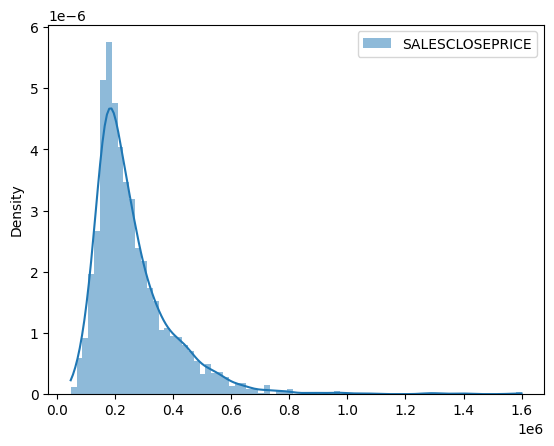

In [19]:
# Sample the dataframe
sample_df = df.select(['SALESCLOSEPRICE']).sample(withReplacement=False, fraction=0.5, seed=42)

# Convert the sample to a Pandas DataFrame
pandas_df = sample_df.toPandas()

# Plot it
_ = sns.histplot(pandas_df, kde=True, stat="density", linewidth=0)

### Relationship plotting

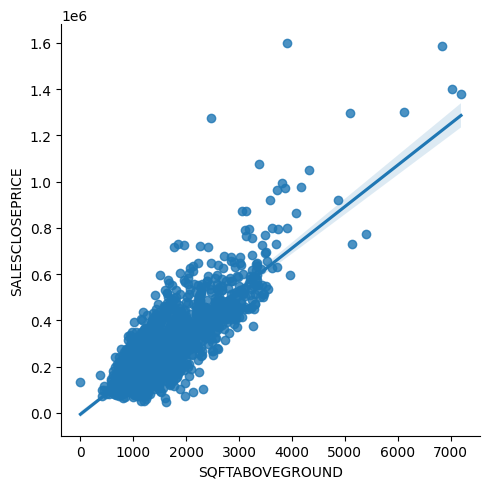

In [20]:
# Select columns
s_df = df.select(['SALESCLOSEPRICE', 'SQFTABOVEGROUND'])

# Sample dataframe
s_df = s_df.sample(withReplacement=False, fraction=0.5, seed=42)

# Convert to Pandas DataFrame
pandas_df = s_df.toPandas()

# Plot it
_ = sns.lmplot(x='SQFTABOVEGROUND', y='SALESCLOSEPRICE', data=pandas_df)

## Ex. 6 - Using Corr()

The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

**Instructions:**

1. Use a for loop iterate through the columns.
2. In each loop cycle, compute the correlation between the current column and `'SALESCLOSEPRICE'` using the `corr()` method.
3. Create logic to update the maximum observed correlation and with which column.
4. Print out the name of the column that has the maximum correlation with `'SALESCLOSEPRICE'`.

In [21]:
# Rreparing the list of columns to review
list_columns = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES', 'PDOM', 'SQFTABOVEGROUND',
                'TAXES', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'YEARBUILT',
                'ACRES', 'BACKONMARKETDATE', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER',
                'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BEDROOMS', 'SQFTBELOWGROUND',
                'ASSOCIATIONFEE', 'ASSESSEDVALUATION']

In [22]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = ''

# Loop to check all columns contained in list
for col_name in list_columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col_name, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col_name
    print(f'Column {col_name:>18} correlation: {corr_val} {"*** promissing" if abs(corr_val) > 0.7 else ""}')
    
print(f'\nColumn with the max correlation: {corr_max_col}')

Column     FOUNDATIONSIZE correlation: 0.6152231695664401 
Column       DAYSONMARKET correlation: 0.10140339667725148 
Column         FIREPLACES correlation: 0.5750292168651635 
Column               PDOM correlation: 0.06577733329086234 
Column    SQFTABOVEGROUND correlation: 0.7901878498502957 *** promissing
Column              TAXES correlation: 0.04330623090283576 
Column TAXWITHASSESSMENTS correlation: 0.6897334172836667 
Column            TAXYEAR correlation: -0.004470665928466218 
Column         LIVINGAREA correlation: 0.8162701823275637 *** promissing
Column          YEARBUILT correlation: 0.2347514203250647 
Column              ACRES correlation: 0.22060612588935327 
Column   BACKONMARKETDATE correlation: nan 
Column          BATHSFULL correlation: 0.4799110284617293 
Column          BATHSHALF correlation: 0.3659595490783439 
Column        BATHQUARTER correlation: -0.0011633745724951648 
Column  BATHSTHREEQUARTER correlation: 0.3270763427022778 
Column         BATHSTOTAL correl

## Ex. 7 - Using Visualizations: distplot

Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the `'LISTPRICE'` variable, and you will gain more insights on its distribution by computing the skewness.

**Instructions:**

1. Sample `50%` of the dataframe df with `sample()` making sure to not use replacement and setting the random seed to `42`.
2. Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
3. Plot a distribution plot using seaborn's `histplot()` method.
4. Import the `skewness()` function from `pyspark.sql.functions` and compute it on the aggregate of the `'LISTPRICE'` column with the `agg()` method. Remember to `collect()` your result to evaluate the computation.

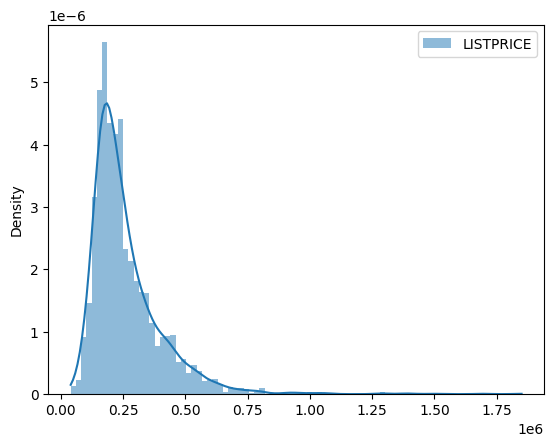

In [23]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(withReplacement=False, fraction=0.5, seed=42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.histplot(pandas_df, kde=True, stat="density", linewidth=0)
plt.show()

In [24]:
# Compute and print skewness of LISTPRICE
calc_skewness = df.agg({'LISTPRICE': 'skewness'}).collect()[0]['skewness(LISTPRICE)']
if calc_skewness < -1:
    skewness_str = 'Extremely Negative Skewed'
elif calc_skewness < -0.5:
    skewness_str = 'Negative Skewed'
elif calc_skewness == 0:
    skewness_str = 'Simetrical Distributed'
elif calc_skewness <= 0.5:
    skewness_str = 'Nearly Simmetrical'
elif calc_skewness <= 1:
    skewness_str = 'Positive Skewed'
elif calc_skewness > 1:
    skewness_str = 'Extremely Positive Skewed'

print(f'Skewness: {calc_skewness} ({skewness_str})')

Skewness: 2.790448093916559 (Extremely Positive Skewed)


In [25]:
# Another way to calculate the skewness
df.select(F.skewness(df.LISTPRICE).alias('LISTPRICE')).first()['LISTPRICE']

2.790448093916559

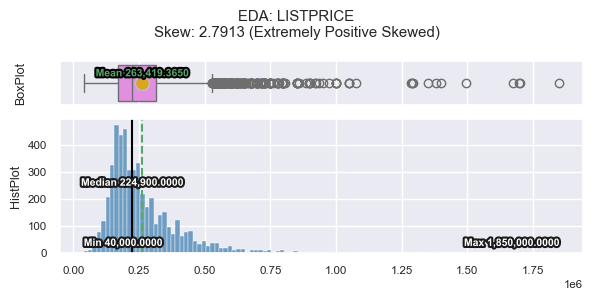

In [26]:
# Using our library
histogram_boxplot(df.select('LISTPRICE').toPandas().LISTPRICE)

## Ex. 8 - Using Visualizations: lmplot

Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

**Instructions:**

1. Using the loaded data set `df` filter it down to the columns `'SALESCLOSEPRICE'` and `'LIVINGAREA'` with `select()`.
2. Sample 50% of the dataframe with `sample()` making sure to not use replacement and setting the random seed to `42`.
3. Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
4. Using `'SALESCLOSEPRICE'` as your dependent variable and `'LIVINGAREA'` as your independent, plot a linear model plot using seaborn `lmplot()`.

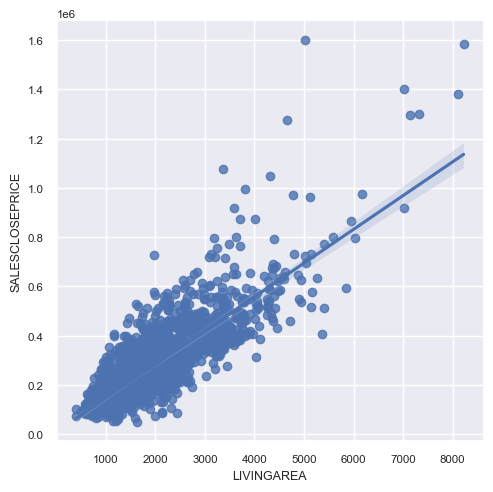

In [27]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()

## Close session

In [28]:
spark.stop()